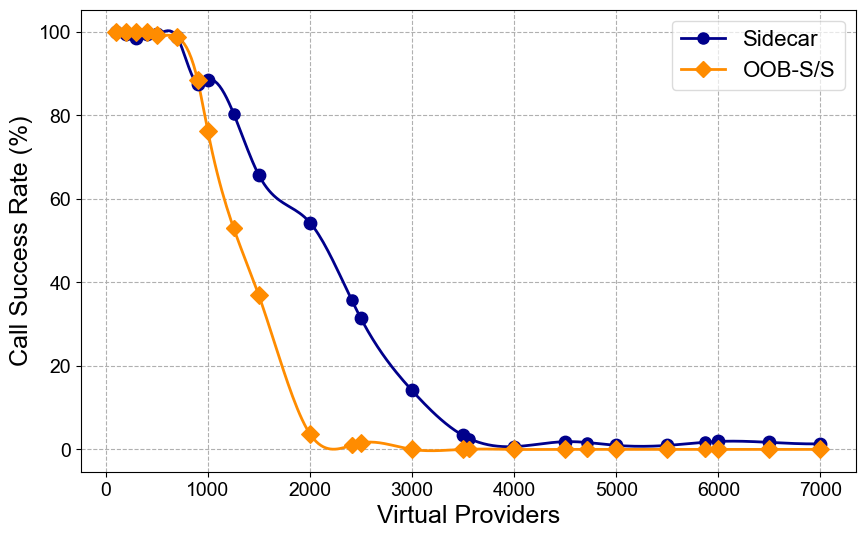

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from scipy.interpolate import make_interp_spline

oobss = 'oob-s/s'
jodi  = 'jodi'
name  = "Sidecar"

# Load the CSV file
df = pd.read_csv("../k6-sr.csv")

mpl.rcParams['font.size']   = 14  
mpl.rcParams.update({
    # Choose sans-serif typeface
    "font.family":      "sans-serif",
    "font.sans-serif":  ["Arial"],

    # Make sure PDFs/SVGs embed real vector (TrueType) outlines
    "pdf.fonttype":     42,
    "ps.fonttype":      42,
})

labelFontSize  = 18
legendFontSize = 16

# Define custom colors and distinct markers for each protocol
colors  = { jodi: "darkblue",   oobss: "darkorange" }
markers = { jodi: "o",          oobss: "D" }  # circle for jodi, diamond for oobss

plt.figure(figsize=(10, 6))

for protocol in df["Protocol"].unique():
    subset    = df[df["Protocol"] == protocol]
    x         = subset["VUs"]
    y         = subset["Success-Rate"]
    proto_lbl = name if protocol == jodi else protocol.upper()
    mkr       = markers[protocol]
    col       = colors[protocol]

    # Plot a smooth line with occasional markers for legend and readability
    if len(x) > 2:
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
        plt.plot(
            x_smooth, y_smooth,
            linestyle="-",
            color=col,
            linewidth=2,
            marker=mkr,
            markevery=50,        # place a marker every 50 points on the smooth line
            markersize=8,
            label=proto_lbl
        )
    else:
        plt.plot(
            x, y,
            linestyle="-",
            color=col,
            linewidth=2,
            marker=mkr,
            markersize=8,
            label=proto_lbl
        )

    # Overlay the exact data points (unlabeled, so they don't add extra legend entries)
    plt.scatter(
        x, y,
        marker=mkr,
        color=col,
        s=80,
        zorder=3
    )

plt.xlabel("Virtual Providers", fontsize=labelFontSize)
plt.ylabel("Call Success Rate (%)", fontsize=labelFontSize)
plt.legend(
    fontsize=legendFontSize,
    title_fontsize=legendFontSize,
    framealpha=0.7,
)
plt.grid(True, linestyle='--', zorder=1)

# Save the figure as a high-resolution PDF
plt.savefig("../charts/throughput.pdf", dpi=300, bbox_inches='tight')

plt.show()
